<a href="https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/LinearRegressionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outline
- Introduction (Purpose + scope)
- Body
  - Load data in repo
  - Linear regression is solving linear equations approximately.
  - Matrix notation of linear regression.
  - Different algebraic ways one can view the problem.
  - The line fitting.
- Conclusion:

##Git Setup

In [1]:
import google.colab
repo_path = 'AminehTechnicalWritings'
!git -C $repo_path pull origin || git clone https://github.com/aminehd/AminehTechnicalWritings/ $repo_path
local_clone = '/content/' + repo_path
!git config --global user.email "amineh.dadsetan@gmail.com"
!git config --global user.name "Amineh Dadsetan"

fatal: cannot change to 'AminehTechnicalWritings': No such file or directory
Cloning into 'AminehTechnicalWritings'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 107 (delta 55), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (107/107), 3.04 MiB | 21.17 MiB/s, done.
Resolving deltas: 100% (55/55), done.


## Introduction
I have created a [jupyter notebook](https://colab.research.google.com/github/aminehd/AminehTechnicalWritings/blob/main/DistributionsOfAspectsOfData.ipynb) to generate some random data.

Note: At the end of each notebook, I save artifact to the repo so we can load them in any subsequent notebook. 👾 📦

The random data from  previous notebook follows the assumption of linear regression. This assumes that if you subtract a linear combination of predictors from the response, the result will have a standard normal distribution. Hence, you can fit a linear model to a given sample.



It's important to pause a bit and notice the differenc of a given sample of size n and the whole population. Let's look at a given sample. ⏸






In [2]:
import numpy as np
files = np.load(local_clone + '/population.npz')
# sample = np.load(local_clone + '/sample.npy'
population = files['arr_0']
population.shape

(300000, 2)

In [3]:
n = 30
sample_index = np.random.choice(population.shape[0], n)
sample = population[sample_index];
sample.shape

(30, 2)

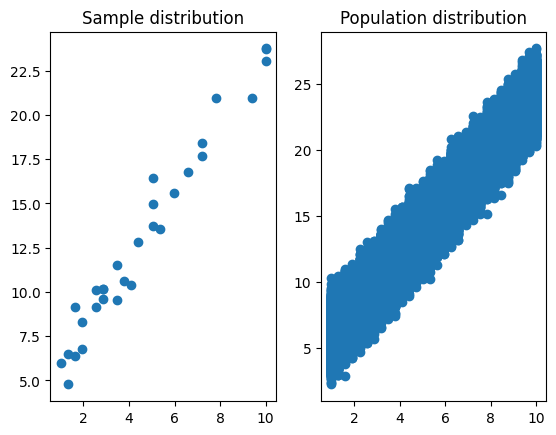

In [4]:
import matplotlib.pyplot as plt
fix, axes = plt.subplots(ncols=2)
# sample[:,0], sample[:,1]
axes[0].scatter(sample[:,0], sample[:,1])
axes[0].set_title('Sample distribution')
axes[1].set_title('Population distribution')
axes[1].scatter(population[:,0], population[:,1])

However, we have not used matrix notation yet. We have considered the sample as  set of size n. Using matrix notation would mean viewing a sample for a given feature,  as a single data point with n-dimensions and not a set anymore. You'll get p n-dimensional vectors. You could also view a sample as n p-dimensinal vectors.

Fitting a linear model to data is similar to solving n equations with p variables, with one small difference. We can add an error term to the right side of the equation, so the system always has a solution. However, the trade-off is that there will always be an error, sometimes less sometimes more.
Adding error term was part of method of [least squar](https://en.wikipedia.org/wiki/Least_squares#:~:text=The%20first%20clear%20and%20concise,the%20shape%20of%20the%20Earth.) invented by  Legendre, french matematician.

The equations for a given sample of size n looks likes:
$$
\begin{align}
y_1 &= \beta_1 x_{11} + \cdots + \beta_p x_{1p} + \beta_0 + \epsilon_1\\
y_2 &= \beta_1 x_{21} + \cdots + \beta_p x_{2p} + \beta_0 + \epsilon_2\\
&\vdots \\
y_n &= \beta_1 x_{n1} + \cdots + \beta_p x_{np}  + \beta_0 + \epsilon_n
\end{align}
$$

Using matrix notation: 🦣
$$
y =
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & \ldots & x_{1p} \\
x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \ldots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\
\vdots \\
\beta_p
\end{bmatrix}
+
\begin{bmatrix}
\beta_0 \\
\beta_0 \\
\vdots \\
\beta_0
\end{bmatrix}
+ ϵ$$

A tiny trick helps putting $\beta_0$ with rest of $\beta_i$'s. At least help visually. 🎉 🧙
$$
y =
\begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p} \\
1 & x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots &\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{np}
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_p \\
\end{bmatrix}
+ ϵ
$$
Another little trick here would help making the left hand side 0. 🧙
$$
0 =
\begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p} & y_1\\
1 & x_{21} & x_{22} & \ldots & x_{2p} & y_2\\
\vdots &\vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{np} & y_n
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\vdots\\
\beta_n\\
-1
\end{bmatrix}
+ ϵ
$$
There is two linear algebraic interpretations of this:


1.   There are p n-dimensional vectors $x_i = [1, x_{1i}, \ldots, x_{np}]^T$. The second formula means we would like the y to happens on the span of $x_i$'s. To solve the system, one would like  a linear combination of the $x_i$'s that equals to y. Subsequently that means finding $p + 1$ scalars $\beta_0, /cdots , \beta_p$.
2.   List item HERE!!!



HERE!! Oh everything looks so nce and neat without the epsilon. what to do with epsilon??
add a paragraph about history of method of least square (euler, legendre --> gause)

import p


At first glance, it looks like we can model these as p  (number of features) in n-dimensional space. And then we can define the purpose to be to find a linear combination of given p points that is equal to y which is another n dimensional vector. That means we sould like that span of p vectors, capture vector y.

But the graphs are another view that is p+1 dimensional space and n points and fitting a linear surface. why? HERE!!!

In [ ]:
We haven't used any matrix notation yet. Let's switch to matrix notation.
At first glance, it looks like we can model these as p  (number of features) in n-dimensional space. And then we can define the purpose to be to find a linear combination of given p points that is equal to y which is another n dimensional vector. That means we sould like that span of p vectors, capture vector y.

But the graphs are another view that is p+1 dimensional space and n points and fitting a linear surface. why? HERE!!!